In [33]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

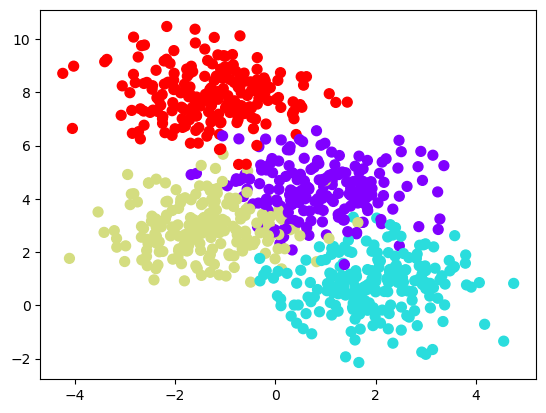

In [13]:
X,y = make_blobs(n_samples = 800, centers = 4, random_state = 0, cluster_std = 1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [32]:
tree = DecisionTreeClassifier().fit(X,y)

In [4]:
def visualize_classifier(model, X, y, ax =None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    ax.scatter(X[:,0], X[:,1], c=y, s = 30, cmap= cmap, clim = (y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    
    ## fit the estimator
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200), 
                        np.linspace(*ylim, num = 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                          levels = np.arange(n_classes + 1)-0.5,
                          cmap = cmap, clim=(y.min(), y.max()), zorder=1)
    
    ax.set(xlim = xlim, ylim = ylim)
    

/tmp/ipykernel_5861/4088837913.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,


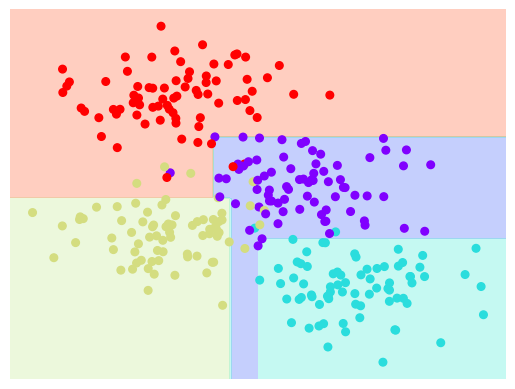

In [10]:
visualize_classifier(DecisionTreeClassifier(max_depth=4), X,y)

Overfitting seems to be a general property of decision trees unless regularization is applied. It becomes easy to go deeper
into the tree to fit the data rather than the overall properties of the distribution the data is drawn from.

### Ensemble Learning

In [29]:
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rf_clf),('svc',svm_clf)],
                             voting="soft")

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [30]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,rf_clf, svm_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    

LogisticRegression 0.925
RandomForestClassifier 0.93125
SVC 0.925
VotingClassifier 0.925


Another way of doing ensemble elarning is to use bagging and pasting methods.

Bagging allows the training instances to be samples several times across multiple predictors, but only bagging allows training
instances to be sampled several times for the same predictor.


##### Train a bagging classifier using decision trees using 500 decison tree classifiers, each trained on 100 samples using bagging technique i.e bootstrap = True

In [34]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators = 500, 
                           max_samples = 100,bootstrap=True, n_jobs= -1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

AttributeError: 'BaggingClassifier' object has no attribute 'redict'